# Installing Packages

In [ ]:
%pip install dask
%pip install gdown
%pip install catboost
%pip install folium
%pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.3 MB/s eta 0:00:00


# Loading Dataset

In [ ]:
import gdown
file_id = "1VppVJ0B9EPXmRdTAUoNno1nSxdMxIkNg"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "crime_data.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1VppVJ0B9EPXmRdTAUoNno1nSxdMxIkNg
From (redirected): https://drive.google.com/uc?id=1VppVJ0B9EPXmRdTAUoNno1nSxdMxIkNg&confirm=t&uuid=26a19123-9707-4b43-98c9-bcfc22243520
To: /content/crime_data.csv
100%|██████████| 1.94G/1.94G [00:58<00:00, 33.2MB/s]


'crime_data.csv'

In [ ]:
import pandas as pd
import dask.dataframe as dd

crime_df = dd.read_csv("crime_data.csv",dtype={'Community Area': 'float64','IUCR': 'object','Location': 'object','Ward': 'float64','District': 'float64'})

# Will be considering 1,00,000 rows by random sampling, as the original dataset has 82,22,573 rows and 22 columns, using all of them will slow down the process or even worsely crash after utilizing all the RAM.
crime_df = crime_df.compute().sample(n=100000,random_state = 123)
crime_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
190700,11272813,JB207465,04/01/2018 10:58:00 AM,064XX S EBERHART AVE,4230,KIDNAPPING,UNLAWFUL RESTRAINT,APARTMENT,False,False,...,20.0,42.0,26,1180686.0,1862406.0,2018,05/04/2018 03:51:04 PM,41.777697,-87.613148,"(41.777696923, -87.613147985)"
14982,11330191,JB283761,05/28/2018 11:00:00 PM,015XX N WESTERN AVE,0620,BURGLARY,UNLAWFUL ENTRY,CONSTRUCTION SITE,False,False,...,1.0,24.0,05,1160131.0,1910107.0,2018,06/04/2018 04:01:50 PM,41.909041,-87.687187,"(41.909041331, -87.687187417)"
71664,8981727,HW129123,01/23/2013 11:30:00 PM,072XX W WELLINGTON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,36.0,17.0,07,1127314.0,1919160.0,2013,02/10/2018 03:50:01 PM,41.934499,-87.807540,"(41.934499029, -87.807540074)"
50436,2459394,HH784252,11/16/2002 11:33:08 PM,015XX W 13TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,True,...,2.0,28.0,08B,1166406.0,1894142.0,2002,02/28/2018 03:56:25 PM,41.865100,-87.664593,"(41.865100146, -87.664593068)"
185608,7268391,HR682520,12/10/2009 02:30:00 AM,018XX W 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,...,21.0,71.0,14,1165666.0,1846986.0,2009,02/28/2018 03:56:25 PM,41.735714,-87.668648,"(41.735714275, -87.668648245)"


## Preparing Data for Exploratory Data Analysis

In [ ]:
# Shape of the Crime Dataset in 1,00,000 rows and 22 columns.
crime_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100000, 22)

In [ ]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 190700 to 57551
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   Case Number           100000 non-null  string 
 2   Date                  100000 non-null  string 
 3   Block                 100000 non-null  string 
 4   IUCR                  100000 non-null  string 
 5   Primary Type          100000 non-null  string 
 6   Description           100000 non-null  string 
 7   Location Description  99827 non-null   string 
 8   Arrest                100000 non-null  bool   
 9   Domestic              100000 non-null  bool   
 10  Beat                  100000 non-null  int64  
 11  District              99997 non-null   float64
 12  Ward                  92425 non-null   float64
 13  Community Area        92442 non-null   float64
 14  FBI Code              100000 non-null  string 
 15  X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Dropping the unnecessary columns.
crime_df = crime_df.drop(columns=['X Coordinate','Y Coordinate','Location','Ward','Beat','FBI Code','Updated On'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
crime_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
190700,11272813,JB207465,04/01/2018 10:58:00 AM,064XX S EBERHART AVE,4230,KIDNAPPING,UNLAWFUL RESTRAINT,APARTMENT,False,False,3.0,42.0,2018,41.777697,-87.613148
14982,11330191,JB283761,05/28/2018 11:00:00 PM,015XX N WESTERN AVE,0620,BURGLARY,UNLAWFUL ENTRY,CONSTRUCTION SITE,False,False,14.0,24.0,2018,41.909041,-87.687187
71664,8981727,HW129123,01/23/2013 11:30:00 PM,072XX W WELLINGTON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,25.0,17.0,2013,41.934499,-87.807540
50436,2459394,HH784252,11/16/2002 11:33:08 PM,015XX W 13TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,True,12.0,28.0,2002,41.865100,-87.664593
185608,7268391,HR682520,12/10/2009 02:30:00 AM,018XX W 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,22.0,71.0,2009,41.735714,-87.668648


In [ ]:
crime_df['Community Area'].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


78

In [ ]:
# As in our crime dataset it is observed that, we only have Community Area Number which is not much comfortable,
# so we will be fetching another dataset as 'commAreas' which consists of the Community Area Name and merge it with
# our crime dataset.
commAreas = pd.read_csv('https://drive.google.com/uc?export=download&id=1HQO6ZRafZPQAcWdu0QKSazVzv1Il1Afb')
commAreas['AREA_NUMBE'] = commAreas['AREA_NUMBE'].astype(float)
commAreas = commAreas[['AREA_NUMBE','COMMUNITY']]
commAreas.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AREA_NUMBE,COMMUNITY
0,35.0,DOUGLAS
1,36.0,OAKLAND
2,37.0,FULLER PARK
3,38.0,GRAND BOULEVARD
4,39.0,KENWOOD


In [ ]:
# Performing Left Join to merge Community Area Dataset with our Crime Dataset to get Community Area names.
merged_crime_df = crime_df.merge(commAreas, left_on='Community Area', right_on='AREA_NUMBE', how='left')
merged_crime_df['COMMUNITY'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['WOODLAWN', 'WEST TOWN', 'DUNNING', 'NEAR WEST SIDE',
       'AUBURN GRESHAM', 'LOGAN SQUARE', 'AVONDALE', 'LINCOLN PARK',
       'EAST GARFIELD PARK', 'BRIDGEPORT', 'ENGLEWOOD', 'ROGERS PARK',
       'SOUTH LAWNDALE', 'MOUNT GREENWOOD', 'CHATHAM', 'WEST RIDGE',
       'OHARE', 'GREATER GRAND CROSSING', nan, 'NORTH LAWNDALE',
       'BELMONT CRAGIN', 'AUSTIN', 'EDGEWATER', 'SOUTH SHORE', 'LOOP',
       'NEAR NORTH SIDE', 'CHICAGO LAWN', 'GARFIELD RIDGE',
       'WEST ENGLEWOOD', 'WASHINGTON HEIGHTS', 'NORTH CENTER',
       'PORTAGE PARK', 'WEST LAWN', 'LAKE VIEW', 'WASHINGTON PARK',
       'HUMBOLDT PARK', 'NEAR SOUTH SIDE', 'WEST PULLMAN', 'ROSELAND',
       'UPTOWN', 'SOUTH DEERING', 'BEVERLY', 'DOUGLAS', 'IRVING PARK',
       'ALBANY PARK', 'SOUTH CHICAGO', 'LINCOLN SQUARE', 'HERMOSA',
       'WEST GARFIELD PARK', 'GRAND BOULEVARD', 'HYDE PARK', 'PULLMAN',
       'LOWER WEST SIDE', 'KENWOOD', 'HEGEWISCH', 'GAGE PARK',
       'WEST ELSDON', 'NEW CITY', 'MORGAN PARK', 'BRIGHTON

In [ ]:
# Renaming the columns for proper understanding.
merged_crime_df = merged_crime_df.rename(columns={'Community Area': 'Community Area Number','COMMUNITY':'Community Area'})
merged_crime_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area Number,Year,Latitude,Longitude,AREA_NUMBE,Community Area
0,11272813,JB207465,04/01/2018 10:58:00 AM,064XX S EBERHART AVE,4230,KIDNAPPING,UNLAWFUL RESTRAINT,APARTMENT,False,False,3.0,42.0,2018,41.777697,-87.613148,42.0,WOODLAWN
1,11330191,JB283761,05/28/2018 11:00:00 PM,015XX N WESTERN AVE,0620,BURGLARY,UNLAWFUL ENTRY,CONSTRUCTION SITE,False,False,14.0,24.0,2018,41.909041,-87.687187,24.0,WEST TOWN
2,8981727,HW129123,01/23/2013 11:30:00 PM,072XX W WELLINGTON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,25.0,17.0,2013,41.934499,-87.807540,17.0,DUNNING
3,2459394,HH784252,11/16/2002 11:33:08 PM,015XX W 13TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,True,12.0,28.0,2002,41.865100,-87.664593,28.0,NEAR WEST SIDE
4,7268391,HR682520,12/10/2009 02:30:00 AM,018XX W 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,22.0,71.0,2009,41.735714,-87.668648,71.0,AUBURN GRESHAM


In [ ]:
# Dropping 'AREA_NUMBE' column, as it is no longer needed.
merged_crime_df = merged_crime_df.drop(columns=['AREA_NUMBE'])
merged_crime_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area Number,Year,Latitude,Longitude,Community Area
0,11272813,JB207465,04/01/2018 10:58:00 AM,064XX S EBERHART AVE,4230,KIDNAPPING,UNLAWFUL RESTRAINT,APARTMENT,False,False,3.0,42.0,2018,41.777697,-87.613148,WOODLAWN
1,11330191,JB283761,05/28/2018 11:00:00 PM,015XX N WESTERN AVE,0620,BURGLARY,UNLAWFUL ENTRY,CONSTRUCTION SITE,False,False,14.0,24.0,2018,41.909041,-87.687187,WEST TOWN
2,8981727,HW129123,01/23/2013 11:30:00 PM,072XX W WELLINGTON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,25.0,17.0,2013,41.934499,-87.807540,DUNNING
3,2459394,HH784252,11/16/2002 11:33:08 PM,015XX W 13TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,True,12.0,28.0,2002,41.865100,-87.664593,NEAR WEST SIDE
4,7268391,HR682520,12/10/2009 02:30:00 AM,018XX W 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,22.0,71.0,2009,41.735714,-87.668648,AUBURN GRESHAM


In [ ]:
# Checking Null or Missing Values in the Dataset.
null_values = merged_crime_df.isnull().sum()
null_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,173
Arrest,0
Domestic,0


In [ ]:
# Imputing rows in Location Description column with Missing values.
merged_crime_df['Location Description'] = merged_crime_df['Location Description'].fillna('Unknown Location')
merged_crime_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area Number,Year,Latitude,Longitude,Community Area
0,11272813,JB207465,04/01/2018 10:58:00 AM,064XX S EBERHART AVE,4230,KIDNAPPING,UNLAWFUL RESTRAINT,APARTMENT,False,False,3.0,42.0,2018,41.777697,-87.613148,WOODLAWN
1,11330191,JB283761,05/28/2018 11:00:00 PM,015XX N WESTERN AVE,0620,BURGLARY,UNLAWFUL ENTRY,CONSTRUCTION SITE,False,False,14.0,24.0,2018,41.909041,-87.687187,WEST TOWN
2,8981727,HW129123,01/23/2013 11:30:00 PM,072XX W WELLINGTON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,25.0,17.0,2013,41.934499,-87.807540,DUNNING
3,2459394,HH784252,11/16/2002 11:33:08 PM,015XX W 13TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,True,12.0,28.0,2002,41.865100,-87.664593,NEAR WEST SIDE
4,7268391,HR682520,12/10/2009 02:30:00 AM,018XX W 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,22.0,71.0,2009,41.735714,-87.668648,AUBURN GRESHAM


In [ ]:
# Dropping rows with Null or Missing Values.
merged_crime_df = merged_crime_df.dropna(subset=['Latitude', 'Longitude', 'Community Area', 'Community Area Number','District'])
merged_crime_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area Number,Year,Latitude,Longitude,Community Area
0,11272813,JB207465,04/01/2018 10:58:00 AM,064XX S EBERHART AVE,4230,KIDNAPPING,UNLAWFUL RESTRAINT,APARTMENT,False,False,3.0,42.0,2018,41.777697,-87.613148,WOODLAWN
1,11330191,JB283761,05/28/2018 11:00:00 PM,015XX N WESTERN AVE,0620,BURGLARY,UNLAWFUL ENTRY,CONSTRUCTION SITE,False,False,14.0,24.0,2018,41.909041,-87.687187,WEST TOWN
2,8981727,HW129123,01/23/2013 11:30:00 PM,072XX W WELLINGTON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,25.0,17.0,2013,41.934499,-87.807540,DUNNING
3,2459394,HH784252,11/16/2002 11:33:08 PM,015XX W 13TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,True,12.0,28.0,2002,41.865100,-87.664593,NEAR WEST SIDE
4,7268391,HR682520,12/10/2009 02:30:00 AM,018XX W 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,22.0,71.0,2009,41.735714,-87.668648,AUBURN GRESHAM


In [ ]:
null_values = merged_crime_df.isnull().sum()
null_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0


#Exploratory Data Analysis

##Univariate EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


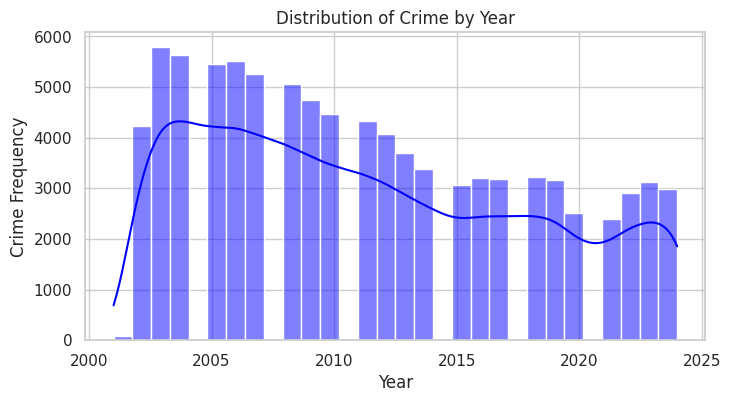

In [ ]:
# Distribution of Numerical Variables
merged_crime_df[['District', 'Community Area', 'Year']].describe().transpose()

# Plotting the Distribution of Crime by Year.
plt.figure(figsize=(8, 4))
sns.histplot(merged_crime_df['Year'].dropna(), kde=True, bins=30, color='blue')
plt.title(f'Distribution of Crime by Year')
plt.xlabel('Year')
plt.ylabel('Crime Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-70-d29324ea592f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_crime_df, y=col, order=merged_crime_df[col].value_counts().index, palette='viridis')


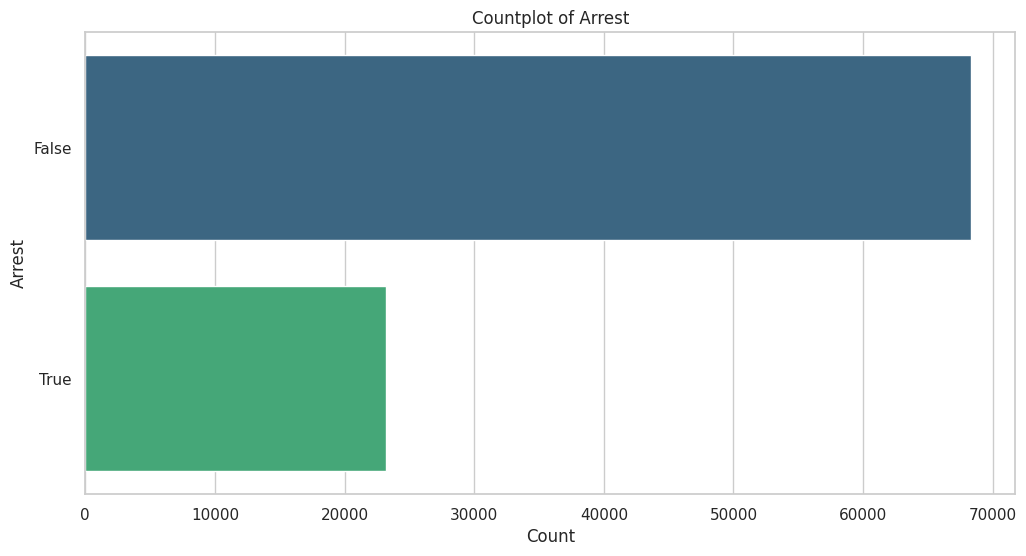

<ipython-input-70-d29324ea592f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_crime_df, y=col, order=merged_crime_df[col].value_counts().index, palette='viridis')


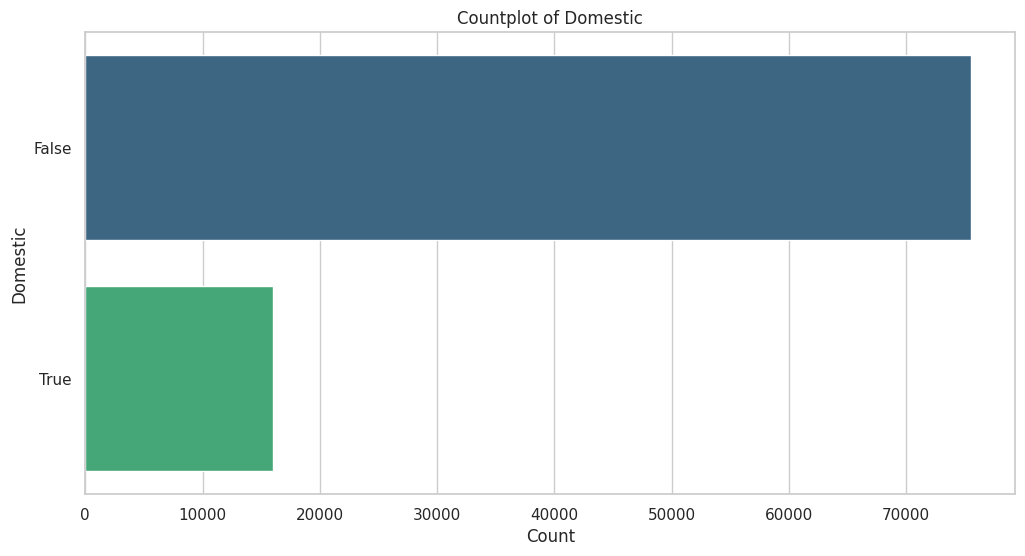

In [ ]:
# Plotting count of Crime by Arrest and Domestic.
arrest_domestic_cols = ['Arrest', 'Domestic']
for col in arrest_domestic_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=merged_crime_df, y=col, order=merged_crime_df[col].value_counts().index, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

In [ ]:
merged_crime_df['Primary Type'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ArrowStringArray>
[                       'KIDNAPPING',                          'BURGLARY',
               'MOTOR VEHICLE THEFT',                           'BATTERY',
                   'CRIMINAL DAMAGE',                             'THEFT',
                           'ASSAULT',                'DECEPTIVE PRACTICE',
                     'OTHER OFFENSE',                         'NARCOTICS',
            'PUBLIC PEACE VIOLATION',                 'WEAPONS VIOLATION',
                             'ARSON',                          'HOMICIDE',
  'INTERFERENCE WITH PUBLIC OFFICER',                           'ROBBERY',
                      'PROSTITUTION',                 'CRIMINAL TRESPASS',
        'OFFENSE INVOLVING CHILDREN',               'CRIM SEXUAL ASSAULT',
                       'SEX OFFENSE',                          'GAMBLING',
              'LIQUOR LAW VIOLATION',           'CRIMINAL SEXUAL ASSAULT',
                      'INTIMIDATION',                          'STALKING',
 'CONC

In [ ]:
# Getting Most Occurring Type of Crimes in the City of Chicago.
most_crime_occurences = merged_crime_df['Primary Type'].value_counts()
most_crime_occurences.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Primary Type,
THEFT,19525
BATTERY,16663
CRIMINAL DAMAGE,10532
NARCOTICS,8346
ASSAULT,6107


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


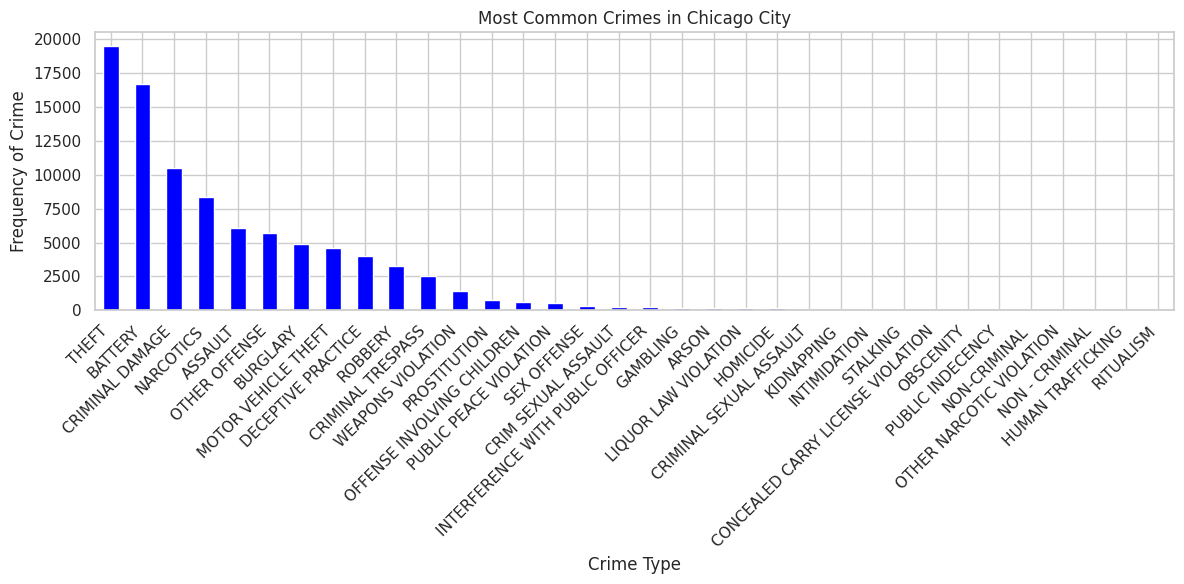

In [ ]:
# Plotting Most Occurring Type of Crimes in the City of Chicago.

sns.set(style = "whitegrid")
plt.figure(figsize = ( 12 , 6 ))
most_crime_occurences.sort_values(ascending=False).plot(kind='bar',color='blue')
plt.title('Most Common Crimes in Chicago City')
plt.xlabel('Crime Type')
plt.ylabel('Frequency of Crime')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

## Bivariate EDA

In [ ]:
# Getting Temporal Trends of Crime in the City of Chicago.
merged_crime_df['Date'] = pd.to_datetime(merged_crime_df['Date'],errors= 'coerce')
merged_crime_df['Month'] = merged_crime_df['Date'].dt.month
temporal_crime_trends = merged_crime_df.groupby(['Month','Year']).size().unstack(fill_value=0)
temporal_crime_trends.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Month,,,,,,,,,,,,,,,,,,,,,
1,9,18,480,414,422,470,392,415,378,346,...,232,229,290,234,226,235,189,192,219,248
2,3,12,388,374,381,389,325,314,358,315,...,193,207,214,209,223,211,149,195,223,237
3,4,20,464,485,456,470,426,421,406,387,...,256,263,229,236,258,182,187,223,266,279
4,5,146,469,472,462,449,415,414,417,357,...,259,225,267,306,256,149,180,231,243,245
5,10,532,546,500,509,473,509,461,416,397,...,283,310,272,301,301,202,202,221,272,284


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


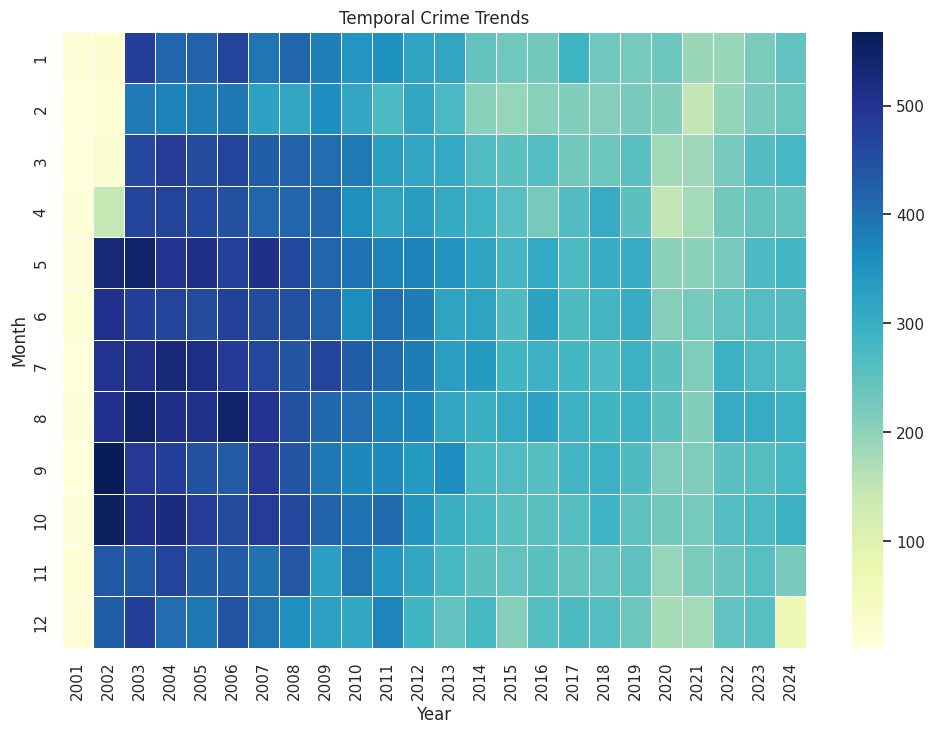

In [ ]:
# Plotting Temporal Trends of Crime.

plt.figure(figsize=(12,8))
sns.heatmap(temporal_crime_trends,cmap='YlGnBu',linewidths=0.5, annot=False)
plt.title('Temporal Crime Trends')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


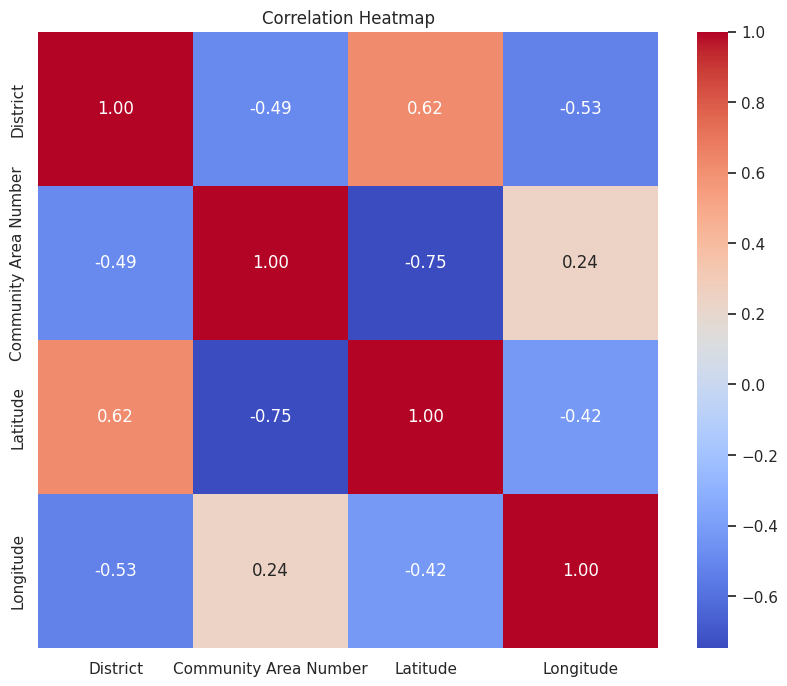

In [ ]:
# Plotting the Correlation Heatmap, between District, Community Area Number, Latitude and Longitude.

correlation_matrix = merged_crime_df[['District', 'Community Area Number', 'Latitude', 'Longitude']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


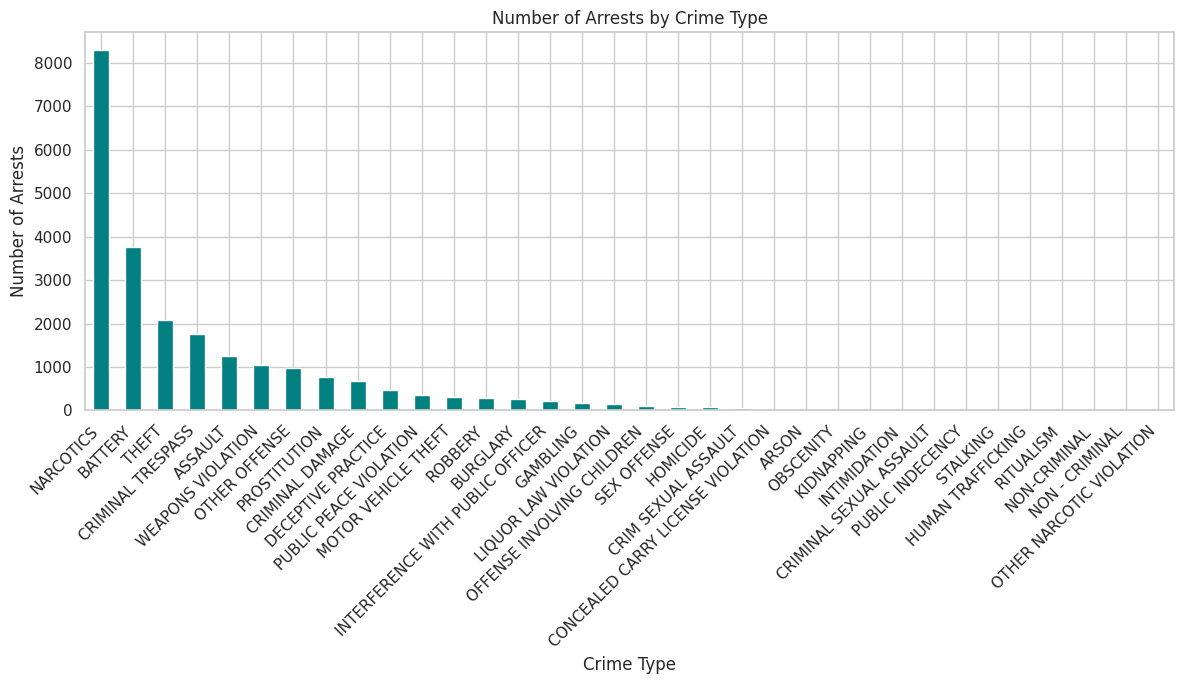

In [ ]:
# Plotting number of Arrest by Crime Type.

arrest_counts_by_crime = merged_crime_df.groupby('Primary Type')['Arrest'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,7))
arrest_counts_by_crime.plot(kind='bar',color='teal')
plt.title('Number of Arrests by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


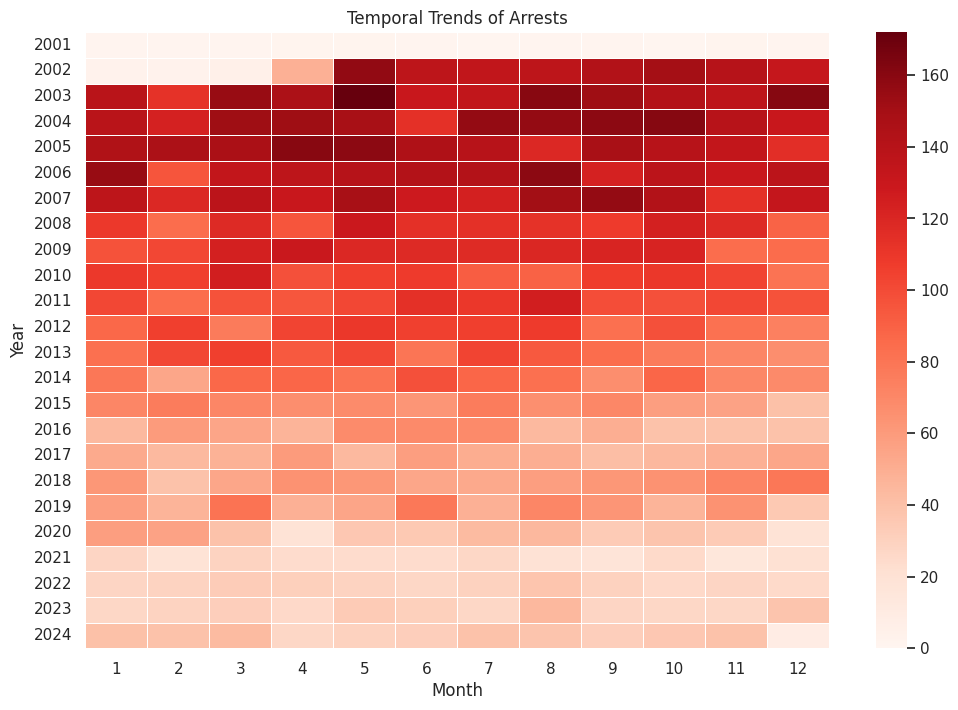

In [ ]:
# Plotting the Temporal Trends of Arrest.

temporal_trends_by_arrest = merged_crime_df.groupby(['Year','Month'])['Arrest'].sum().unstack(fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(temporal_trends_by_arrest,cmap='Reds',linewidths=0.5,annot=False)
plt.title('Temporal Trends of Arrests')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


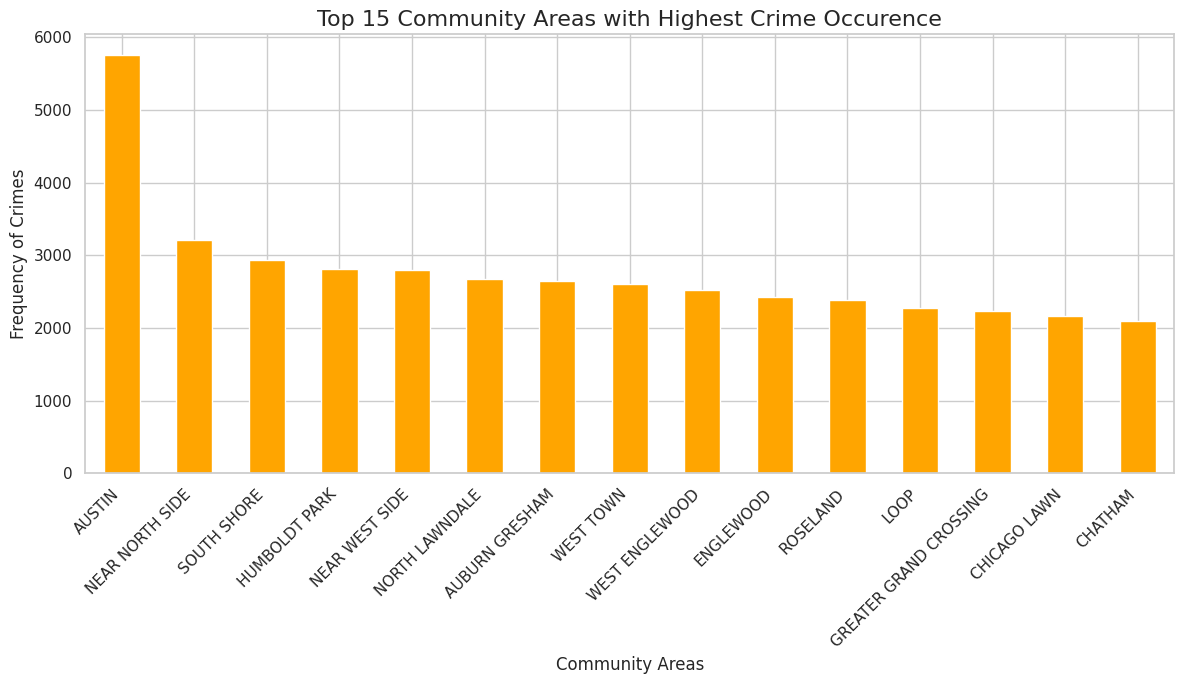

In [ ]:
# Plotting Top 15 Community Area with High Frequency of Crime.

crime_by_community_area = merged_crime_df['Community Area'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,7))
crime_by_community_area.head(15).plot(kind='bar',color='orange')
plt.title('Top 15 Community Areas with Highest Crime Occurence',fontsize = 16)
plt.xlabel('Community Areas',fontsize = 12)
plt.ylabel('Frequency of Crimes',fontsize = 12)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


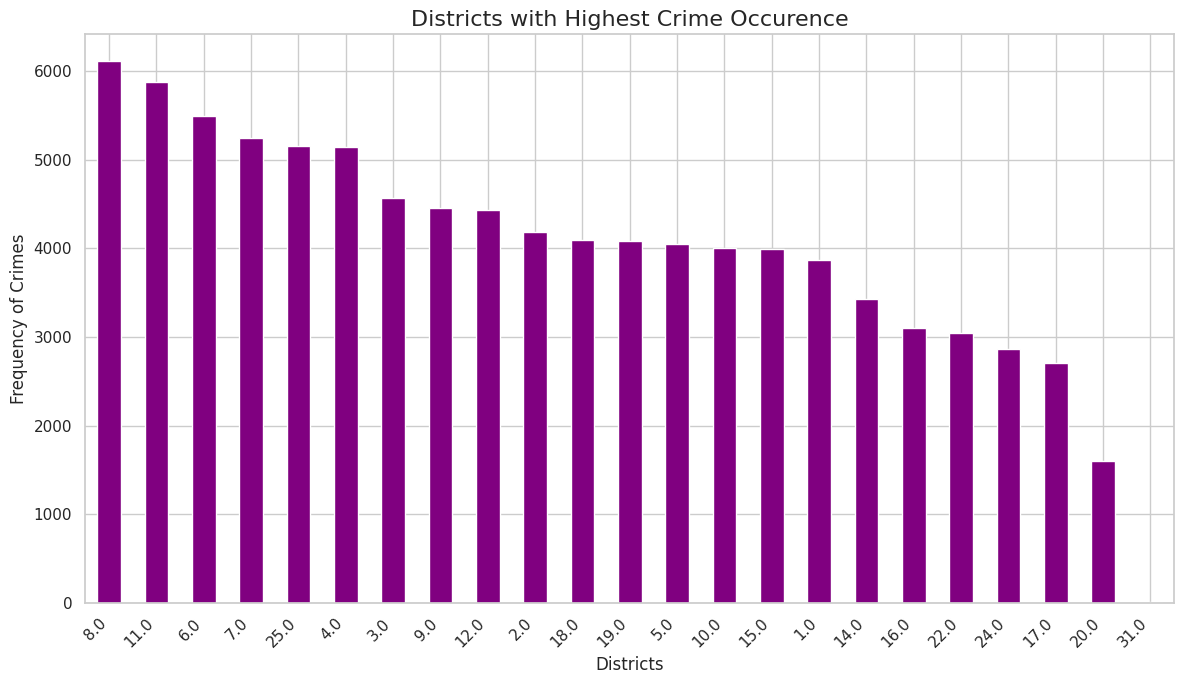

In [ ]:
# Plotting high Frequency of Crime by Districts in the City of Chicago.

crime_by_district = merged_crime_df['District'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,7))
crime_by_district.plot(kind='bar',color='purple')
plt.title('Districts with Highest Crime Occurence',fontsize = 16)
plt.xlabel('Districts',fontsize = 12)
plt.ylabel('Frequency of Crimes',fontsize = 12)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

# Problem 1

## Topic Modeling on Type of Crime

**Goal:** This code aims to uncover hidden patterns in crime-related data by applying Latent Dirichlet Allocation (LDA) for topic modeling. Specifically, it focuses on analyzing the "Primary Type" of crimes to discover topics or groups of related crime types that frequently occur together. The model preprocesses the crime text data, removes common stopwords (including crime-specific terms), lemmatizes words, and uses the LDA algorithm to extract topics from the corpus. Additionally, the coherence score evaluates the model's quality. Ultimately, this analysis will help understand the dominant themes in crime occurrences, which could be useful for law enforcement and public policy initiatives.

**Algorithms Used:**

1.   Latent Dirichlet Allocation(LDA) (Unsupervised)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import Phrases
from gensim.models.phrases import Phraser
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Data Pre-Processing

In [ ]:
# Preparing the Data.
lda_crime_data = merged_crime_df.copy()
lda_crime_data['Combined_Text'] = lda_crime_data['Primary Type'].fillna('')

# Data Pre-Processing.
lemmatizer = WordNetLemmatizer()
crime_stopwords = ['crime', 'police', 'victim', 'offender', 'incident', 'arrest', 'murder', 'robbery', 'assault', 'theft', 'burglary','intimidation', 'homicide', 'gambling', 'damage', 'weapon', 'involving','law', 'public', 'violation', 'offense', 'criminal','practice']
stop_words = set(stopwords.words('english'))
combinded_stop_words = stop_words.union(crime_stopwords)

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in combinded_stop_words]
    return tokens

processed_texts = lda_crime_data['Combined_Text'].apply(preprocess_text)
final_processed_crime_texts = processed_texts.apply(lambda x: ' '.join(x))

# Vectorizing the Processed Crime Texts with some Adjustments.
vectorizer = CountVectorizer(max_df=0.85, min_df=5, stop_words='english')
vectorized_crime_texts = vectorizer.fit_transform(final_processed_crime_texts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Training Latent Dirichlet Allocation(LDA) Model

In [ ]:
# Training Latent Dirichlet Allocation Model

# Adjusting LDA Parameters
num_topics = 10
alpha = 0.1
eta = 0.1

lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=50,doc_topic_prior=alpha, topic_word_prior=eta, random_state=123)
lda_model.fit(vectorized_crime_texts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(doc_topic_prior=0.1, max_iter=50, random_state=123,
                          topic_word_prior=0.1)

In [ ]:
# Fetching Topics and their Keywords.
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        keywords = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(keywords)
    return topics

# Extracting the Crime Topics.
feature_names = vectorizer.get_feature_names_out()
crime_topics = display_topics(lda_model, feature_names, no_top_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Evaluating Latent Dirichlet Allocation(LDA) Model

In [ ]:
# Evaluating the model with Coherence Score.

dictionary = Dictionary([doc.split() for doc in final_processed_crime_texts])
dictionary.filter_extremes(no_below=5, no_above=0.85)
corpus = [dictionary.doc2bow(doc.split()) for doc in final_processed_crime_texts]
coherence_model = CoherenceModel(topics=crime_topics, texts=[doc.split() for doc in final_processed_crime_texts], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Topics:", crime_topics)
print("Coherence Score:", coherence_score)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics: [['child', 'battery', 'narcotic', 'deceptive', 'motor', 'vehicle', 'trespass', 'stalking', 'sex', 'peace'], ['deceptive', 'concealed', 'carry', 'license', 'battery', 'narcotic', 'motor', 'vehicle', 'trespass', 'stalking'], ['vehicle', 'motor', 'battery', 'narcotic', 'deceptive', 'trespass', 'stalking', 'sex', 'peace', 'prostitution'], ['liquor', 'arson', 'kidnapping', 'obscenity', 'battery', 'narcotic', 'deceptive', 'vehicle', 'motor', 'trespass'], ['trespass', 'battery', 'narcotic', 'deceptive', 'motor', 'vehicle', 'stalking', 'sex', 'peace', 'prostitution'], ['narcotic', 'battery', 'deceptive', 'motor', 'vehicle', 'trespass', 'stalking', 'sex', 'peace', 'prostitution'], ['battery', 'narcotic', 'deceptive', 'motor', 'vehicle', 'trespass', 'stalking', 'sex', 'peace', 'prostitution'], ['prostitution', 'peace', 'sexual', 'sex', 'crim', 'stalking', 'battery', 'narcotic', 'deceptive', 'motor'], ['officer', 'interference', 'battery', 'narcotic', 'deceptive', 'vehicle', 'motor', 'tre

### **Trails and Results of Hyperparameter Tuning for LDA Model**

Before considering the above(i.e. Topics and Coherence Score) as the final results, various trails were executed by tuning the Hyperparameters on the performance of the Latent Dirichlet Allocation (LDA) model, whose results are explained below.

---

#### **Overview of LDA Hyperparameters**

- **Number of Topics (Topic Count):** Determines the granularity of clustering. A higher count may lead to more specific topics, while a lower count produces broader topics.
- **Alpha (doc_topic_prior):** Controls the distribution of topics per document. A lower value encourages documents to concentrate on fewer topics.
- **Eta (topic_word_prior):** Controls the distribution of words per topic. A lower value focuses topics on fewer words.
- **Stopwords List:** Enhancing the list with domain-specific words improves relevance by excluding common yet uninformative terms.
- **Iteration Count:** Increases the stability of the LDA model's results during training.

---

#### **Trail Results**

Below is the summary of the trails, including topics generated and coherence scores:

1. **Topics:**
    - [['theft', 'offense', 'involving', 'child', 'sex', 'officer', 'interference', 'public', 'law', 'violation'], ['battery', 'assault', 'robbery', 'sexual', 'crim', 'stalking', 'weapon', 'deceptive', 'intimidation', 'interference'], ['narcotic', 'burglary', 'vehicle', 'theft', 'motor', 'practice', 'deceptive', 'prostitution', 'gambling', 'license'], ['criminal', 'damage', 'trespass', 'violation', 'weapon', 'public', 'peace', 'homicide', 'kidnapping', 'indecency']]
    - **Coherence Score:** `0.5117`  
    - **Hyperparameters:** Topics = 4, Alpha = 0.01, Eta = 0.01  

2. **Topics:**
    - [['theft', 'offense', 'trespass', 'criminal', 'violation', 'weapon', 'public', 'involving', 'child', 'peace'], ['battery', 'criminal', 'damage', 'assault', 'robbery', 'sexual', 'crim', 'stalking', 'weapon', 'gambling'], ['narcotic', 'burglary', 'theft', 'motor', 'vehicle', 'practice', 'deceptive', 'prostitution', 'gambling', 'intimidation']]  
    - **Coherence Score:** `0.5444`  
    - **Hyperparameters:** Topics = 3, Alpha = 0.01, Eta = 0.01  

3. **Topics:**
    - [['theft', 'offense', 'motor', 'vehicle', 'deceptive', 'practice', 'violation', 'weapon', 'public', 'involving'], ['battery', 'criminal', 'damage', 'narcotic', 'assault', 'burglary', 'robbery', 'trespass', 'prostitution', 'sexual']]
    - **Coherence Score:** `0.5651`  
    - **Hyperparameters:** Topics = 2, Alpha = 0.01, Eta = 0.01  
    - **Improvements:** Added domain-specific stopwords.

4. **Topics:**
    - [['arson', 'intimidation', 'obscenity', 'deceptive', 'involving', 'interference', 'homicide', 'gambling', 'damage', 'law'], ['criminal', 'damage', 'deceptive', 'kidnapping', 'involving', 'intimidation', 'interference', 'homicide', 'gambling', 'weapon'], ['battery', 'weapon', 'deceptive', 'kidnapping', 'involving', 'intimidation', 'interference', 'homicide', 'gambling', 'damage'], ['narcotic', 'public', 'violation', 'peace', 'sexual', 'crim', 'interference', 'officer', 'damage', 'homicide'], ['violation', 'liquor', 'law', 'concealed', 'license', 'carry', 'child', 'crim', 'criminal', 'damage'], ['offense', 'sex', 'weapon', 'deceptive', 'involving', 'intimidation', 'interference', 'homicide', 'gambling', 'damage'], ['vehicle', 'motor', 'weapon', 'deceptive', 'involving', 'intimidation', 'interference', 'homicide', 'gambling', 'damage'], ['practice', 'deceptive', 'weapon', 'violation', 'homicide', 'kidnapping', 'carry', 'child', 'concealed', 'crim'], ['prostitution', 'gambling', 'damage', 'involving', 'intimidation', 'interference', 'homicide', 'deceptive', 'weapon', 'law'], ['criminal', 'trespass', 'involving', 'child', 'stalking', 'deceptive', 'intimidation', 'interference', 'homicide', 'gambling']]
  
    - **Coherence Score:** `0.5938`  
    - **Hyperparameters:** Topics = 10, Alpha = 0.01, Eta = 0.01  
    - **Improvements:** Optimized `min_df` and `max_df` in CountVectorizer.

5. **Topics:**
    - [['arson', 'intimidation', 'obscenity', 'battery', 'narcotic', 'criminal', 'kidnapping', 'homicide', 'damage', 'violation'], ['criminal', 'damage', 'sexual', 'battery', 'narcotic', 'kidnapping', 'homicide', 'violation', 'offense', 'stalking'], ['battery', 'narcotic', 'criminal', 'kidnapping', 'homicide', 'damage', 'violation', 'offense', 'sexual', 'stalking'], ['narcotic', 'public', 'violation', 'peace', 'sexual', 'crim', 'interference', 'officer', 'criminal', 'battery'], ['violation', 'liquor', 'law', 'license', 'carry', 'concealed', 'narcotic', 'battery', 'criminal', 'kidnapping'], ['offense', 'sex', 'involving', 'child', 'battery', 'narcotic', 'criminal', 'kidnapping', 'homicide', 'damage'], ['motor', 'vehicle', 'battery', 'narcotic', 'criminal', 'kidnapping', 'homicide', 'damage', 'violation', 'offense'], ['practice', 'deceptive', 'weapon', 'violation', 'homicide', 'kidnapping', 'battery', 'narcotic', 'criminal', 'damage'], ['prostitution', 'gambling', 'battery', 'narcotic', 'criminal', 'kidnapping', 'homicide', 'damage', 'violation', 'offense'], ['criminal', 'trespass', 'involving', 'child', 'stalking', 'offense', 'sexual', 'battery', 'narcotic', 'kidnapping']]

    - **Coherence Score:** `0.5975`  
    - **Hyperparameters:** Topics = 10, Alpha = 0.1, Eta = 0.1  
6. **Topics**
    - [['child', 'battery', 'stalking', 'arson', 'narcotic', 'vehicle', 'motor', 'deceptive', 'practice', 'kidnapping'], ['battery', 'stalking', 'arson', 'narcotic', 'vehicle', 'motor', 'practice', 'deceptive', 'kidnapping', 'trespass'], ['narcotic', 'arson', 'stalking', 'carry', 'concealed', 'license', 'battery', 'vehicle', 'motor', 'practice'], ['sexual', 'crim', 'liquor', 'battery', 'stalking', 'arson', 'narcotic', 'vehicle', 'motor', 'practice'], ['practice', 'deceptive', 'battery', 'stalking', 'arson', 'narcotic', 'vehicle', 'motor', 'kidnapping', 'trespass'], ['battery', 'stalking', 'arson', 'narcotic', 'vehicle', 'motor', 'practice', 'deceptive', 'kidnapping', 'trespass'], ['trespass', 'officer', 'interference', 'kidnapping', 'battery', 'stalking', 'arson', 'narcotic', 'vehicle', 'motor'], ['motor', 'vehicle', 'battery', 'stalking', 'arson', 'narcotic', 'practice', 'deceptive', 'kidnapping', 'trespass'], ['prostitution', 'sex', 'obscenity', 'battery', 'stalking', 'arson', 'narcotic', 'vehicle', 'motor', 'practice'], ['peace', 'battery', 'stalking', 'arson', 'narcotic', 'vehicle', 'motor', 'deceptive', 'practice', 'kidnapping']]
    - Filtered rare words from the dictionary.
    - Updated some domain specific stopwords.
    - **Coherence Score:** `0.6183`  
    - **Hyperparameters:** Topics = 10, Alpha = 0.1, Eta = 0.1.

7. **Final Consideration:**  
    - Topics were refined to include domain-specific terms:  
    - [['child', 'battery', 'narcotic', 'deceptive', 'motor', 'vehicmle', 'trespass', 'stalking', 'sex', 'peace'], ['deceptive', 'concealed', 'carry', 'license', 'battery', 'narcotic', 'motor', 'vehicle', 'trespass', 'stalking'], ['motor', 'vehicle', 'battery', 'narcotic', 'deceptive', 'trespass', 'stalking', 'sex', 'peace', 'prostitution'], ['liquor', 'arson', 'kidnapping', 'obscenity', 'battery', 'narcotic', 'deceptive', 'vehicle', 'motor', 'trespass'], ['trespass', 'battery', 'narcotic', 'deceptive', 'motor', 'vehicle', 'stalking', 'sex', 'peace', 'prostitution'], ['narcotic', 'battery', 'deceptive', 'motor', 'vehicle', 'trespass', 'stalking', 'sex', 'peace', 'prostitution'], ['battery', 'narcotic', 'deceptive', 'motor', 'vehicle', 'trespass', 'stalking', 'sex', 'peace', 'prostitution'], ['prostitution', 'peace', 'sexual', 'sex', 'crim', 'stalking', 'battery', 'narcotic', 'deceptive', 'motor'], ['officer', 'interference', 'battery', 'narcotic', 'deceptive', 'vehicle', 'motor', 'trespass', 'stalking', 'sex'], ['battery', 'narcotic', 'deceptive', 'motor', 'vehicle', 'trespass', 'stalking', 'sex', 'peace', 'prostitution']]
  
    - **Coherence Score:** `0.6591`  
    - **Hyperparameters:** Topics = 10, Alpha = 0.1, Eta = 0.1, Increased iterations.  

---

#### **Key Observations**

1. Increasing the **topic count** enhances coherence but requires careful balancing to avoid overly granular topics.
2. Fine-tuning **alpha** and **eta** significantly impacts the model's ability to cluster words effectively.
3. Filtering rare words and updating the **stopwords list** improves the model's focus on meaningful terms.
4. Higher **iteration counts** result in more stable and reproducible topics.
5. A final coherence score of `0.6591` indicated a strong topic model.

---

#### **Conclusion**

By iteratively tuning Hyperparameters and Preprocessing techniques, the final LDA Model produces Interpretable and Coherent topics. This model serves as a Robust tool for analyzing the Crime data and Uncovering Latent Patterns.


# Problem 2

## Crime Hotspot Detection and Clustering

**Goal:** The aim of this analysis is to identify and visualize crime hotspots in Chicago by combining machine learning algorithms such as CatBoost and Gaussian Mixture Models (GMM) with spatial clustering techniques(Ensemble Methodology). By analyzing the latitude, longitude, and other features of crime data, this project seeks to classify regions into high-risk categories, detect outliers, and create a detailed map highlighting crime hotspots and clusters in the city. The final result is an interactive map that overlays clusters of criminal activity along with risk levels, helping law enforcement and city planners focus their efforts on the most critical areas.

**Algorithms Used:**

1.   CatBoost Classifier (Supervised)
2.   Gaussian Mixture (Unsupervised)
3.   Isolation Forest (Unsupervised)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import folium

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Data Pre-Processing

In [ ]:

# Handling missing values for Latitude and Longitude by dropping rows.
merged_crime_df = merged_crime_df.dropna(subset=['Latitude', 'Longitude'])

# Defining a threshold for "Hotspot" classification based on the number of crimes per Community Area.
crime_counts = merged_crime_df['Community Area'].value_counts()
hotspot_threshold = crime_counts.quantile(0.75)  # Top 25% of crime-prone areas as hotspots

merged_crime_df['Hotspot'] = merged_crime_df['Community Area'].map(lambda x: 1 if crime_counts[x] >= hotspot_threshold else 0)

# Features and Target Variables.
features = merged_crime_df[['Latitude', 'Longitude', 'District', 'Community Area Number', 'Month']]
target = merged_crime_df['Hotspot']

# Splitting the variables into Training and Testing sets with 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Training and Evaluating CatBoost Classifier Model

In [ ]:
# Training CatBoost Classifier Model
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, random_seed=123, verbose=200)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)
y_pred_catboost = catboost_model.predict(X_test)

# Evaluating the model using Evaluation Metrics.
evaluation_metrics = classification_report(y_test, y_pred_catboost)
print("Evaluation Metrics :\n", evaluation_metrics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0:	learn: 0.6264912	test: 0.6263992	best: 0.6263992 (0)	total: 17.8ms	remaining: 17.8s
200:	learn: 0.0006983	test: 0.0009419	best: 0.0009419 (200)	total: 4.92s	remaining: 19.5s
400:	learn: 0.0006978	test: 0.0009416	best: 0.0009416 (400)	total: 11.8s	remaining: 17.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.0009415562237
bestIteration = 418

Shrink model to first 419 iterations.
Evaluation Metrics :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12255
           1       1.00      1.00      1.00     15197

    accuracy                           1.00     27452
   macro avg       1.00      1.00      1.00     27452
weighted avg       1.00      1.00      1.00     27452



### Elbow Curve

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


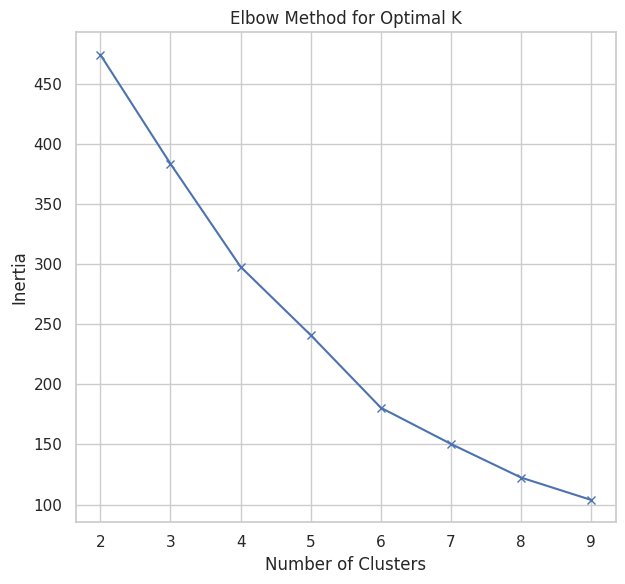

In [ ]:
from sklearn.cluster import KMeans

# Applying Elbow Method to determine the suitable count of clusters.
inertia = []
silhouette = []
range_n_clusters = range(2, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=123)
    cluster_labels = kmeans.fit_predict(merged_crime_df[['Latitude', 'Longitude']])
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, 'bx-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

### Training Gaussian Mixture Model

In [ ]:
# Applying Gaussian Mixture on Spatial Features for Clustering.
clusters_count = 4 # From the Elbow curve, clusters with the count of 4 will be suitable.
gmm = GaussianMixture(n_components=clusters_count,random_state=123)
merged_crime_df['Cluster'] = gmm.fit_predict(merged_crime_df[['Latitude', 'Longitude']])

# Output results
print("\nClustering Results:\n", merged_crime_df[['Community Area', 'Hotspot', 'Cluster']].head(10))
merged_crime_df['Cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Clustering Results:
        Community Area  Hotspot  Cluster
0            WOODLAWN        0        1
1           WEST TOWN        1        0
2             DUNNING        0        0
3      NEAR WEST SIDE        1        0
4      AUBURN GRESHAM        1        1
5        LOGAN SQUARE        1        0
6            AVONDALE        0        0
7        LINCOLN PARK        0        2
8            WOODLAWN        0        1
9  EAST GARFIELD PARK        1        0


,count
Cluster,
1,39298
0,33437
2,18767
3,2


In [ ]:
# As we observed some anomalous data points above, we'll be detecting and handling the outliers using Outlier Detection Method.
# In our case, we'll be using IsolationForest for doing so.

from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(random_state=123)
outliers = iso_forest.fit_predict(merged_crime_df[['Latitude', 'Longitude']])
merged_crime_df[['Latitude', 'Longitude']] = merged_crime_df[['Latitude', 'Longitude']][outliers == 1]
outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 1,  1, -1, ...,  1,  1,  1])

In [ ]:
# Dropping the Null or Missing Values in the dataset after handling the Outliers.
merged_crime_df = merged_crime_df.dropna(subset=['Latitude', 'Longitude'])
null_values = merged_crime_df.isnull().sum()
null_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0


In [ ]:
# Applying GaussianMixture algorithm again after handling Outliers.
gmm = GaussianMixture(n_components=4,random_state=123)
merged_crime_df['Cluster'] = gmm.fit_predict(merged_crime_df[['Latitude', 'Longitude']])
merged_crime_df['Cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Cluster,
1,28159
3,14474
0,13668
2,12517


### Evaluating Gaussian Mixture Model

In [ ]:
# Evaluating the GMM Model using appropriate metrics.
log_likelihood = gmm.lower_bound_
aic = gmm.aic(merged_crime_df[['Latitude', 'Longitude']])
bic = gmm.bic(merged_crime_df[['Latitude', 'Longitude']])
db_index = davies_bouldin_score(merged_crime_df[['Latitude', 'Longitude']], gmm.predict(merged_crime_df[['Latitude', 'Longitude']]))
ch_score = calinski_harabasz_score(merged_crime_df[['Latitude', 'Longitude']], gmm.predict(merged_crime_df[['Latitude', 'Longitude']]))

print(f"Log-Likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Score:", ch_score)


Log-Likelihood: 3.3439020901163308
AIC: -460298.31650781585
BIC: -460088.1144336108
Davies-Bouldin Index: 0.9360526954864394
Calinski-Harabasz Score: 78196.08429821709


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Hybrid Ensemble Method



In [ ]:
# Combining Results for Ensemble Prediction.
# Adding the CatBoost predictions as a feature to the Crime Data.
merged_crime_df['CatBoost_Prediction'] = catboost_model.predict(merged_crime_df[['Latitude', 'Longitude', 'District', 'Community Area Number', 'Month']])

# Filtering data with Hotspot regions.
hotspot_1_crime_data = merged_crime_df[merged_crime_df['Hotspot'] == 1]
hotspot_1_crime_data['Cluster'].value_counts()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Cluster,
1,20464
0,9542
2,9360
3,8338


In [ ]:
# Hybrid Ensemble Approach: Combining CatBoost Model (Primary Predictor) and GaussianMixture Model (Segmentor).
merged_crime_df['High_Risk_Ensemble'] = merged_crime_df.apply(
    lambda row: 1 if row['CatBoost_Prediction'] == 1 and row['Cluster'] == 1 else
                2 if row['CatBoost_Prediction'] == 1 and row['Cluster'] == 0 else
                3 if row['CatBoost_Prediction'] == 1 and row['Cluster'] == 2 else 4,
    axis=1
)

merged_crime_df['High_Risk_Ensemble'].value_counts()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
High_Risk_Ensemble,
4,29450
1,20464
2,9542
3,9362


### Cluster and Risk Hotspots Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


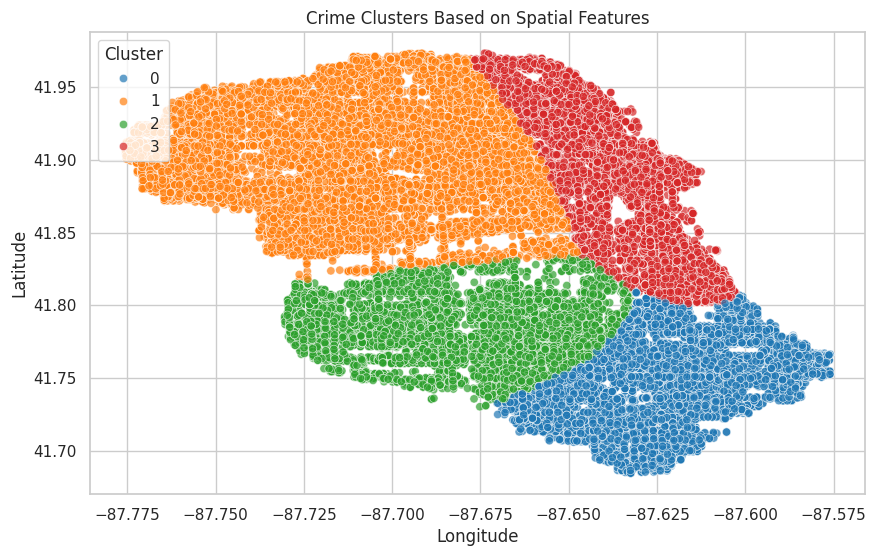

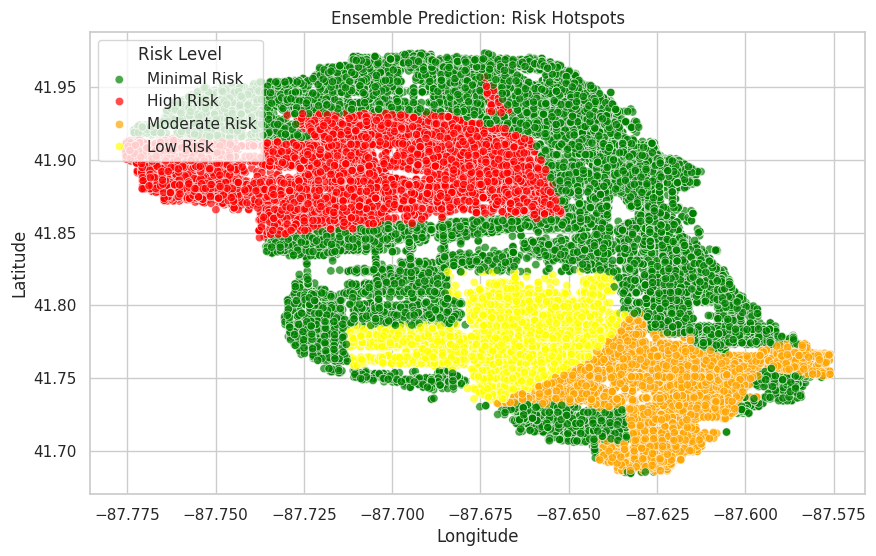

,Community Area,CatBoost_Prediction,Cluster,High_Risk_Ensemble
0,WOODLAWN,0,0,4
1,WEST TOWN,1,1,1
3,NEAR WEST SIDE,1,1,1
4,AUBURN GRESHAM,1,2,3
5,LOGAN SQUARE,1,1,1


In [ ]:
# Visualizations of Clusters and Hotspots

# Plotting Clusters.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Longitude', y='Latitude', hue='Cluster', palette='tab10', data=merged_crime_df, alpha=0.7
)
plt.title("Crime Clusters Based on Spatial Features")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster", loc='upper left')
plt.show()

# Plotting the Risk Hotspots.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Longitude', y='Latitude', hue='High_Risk_Ensemble', palette = {
    1: 'red',    # High Risk
    2: 'orange', # Moderate Risk
    3: 'yellow', # Low Risk
    4: 'green',  # Minimal Risk
}, data=merged_crime_df, alpha=0.7
)
plt.title("Ensemble Prediction: Risk Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Risk Level", loc='upper left', labels=["Minimal Risk", "High Risk" , "Moderate Risk", "Low Risk"])
plt.show()

# Return combined ensemble summary
ensemble_summary = merged_crime_df[['Community Area', 'CatBoost_Prediction', 'Cluster', 'High_Risk_Ensemble']].head()
ensemble_summary

### Visualization on the Map of Chicago City.

In [ ]:
# Note: This cell will consume time and RAM to execute. So, I appreciate your patience if running this cell.


# Focusing Map around Chicago City.
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Initially, plotting the clusters.
for _, row in merged_crime_df.iterrows():
    cluster_color = {0: 'blue', 1: '#ff00ff', 2: '#00ffff', 3: 'purple'}.get(row['Cluster'], 'gray')
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=7,  # Smaller size for clusters
        color=cluster_color,
        fill=True,
        fill_opacity=0.7,  # Lower opacity for clusters
        tooltip=f"Cluster: {row['Cluster']} | Area: {row['Community Area']}"
    ).add_to(chicago_map)

# Overlaying High-Risk Hotspots.
for _, row in merged_crime_df.iterrows():
    if row['High_Risk_Ensemble'] == 1:  # Highlights High Risk Areas.
        folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=4,
            color='red',
            fill=True,
            fill_opacity=0.3,  # Transparent Red for Hotspots
            tooltip=f"High Risk Area: {row['Community Area']}"
        ).add_to(chicago_map)

    elif row['High_Risk_Ensemble'] == 2:  # Highlights Moderate Risk Areas.
        folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=4,
            color='orange',
            fill=True,
            fill_opacity=0.3,  # Transparent Orange for Hotspots
            tooltip=f"Moderate Risk Area: {row['Community Area']}"
        ).add_to(chicago_map)

    elif row['High_Risk_Ensemble'] == 3:  # Highlights Low Risk Areas.
        folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=4,
            color='yellow',
            fill=True,
            fill_opacity=0.3,  # Transparent Yellow for Hotspots
            tooltip=f"Low Risk Area: {row['Community Area']}"
        ).add_to(chicago_map)

    elif row['High_Risk_Ensemble'] == 4:  # Highlights Minimal Risk Areas.
        folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=4,
            color='green',
            fill=True,
            fill_opacity=0.3,  # Transparent Green for Hotspots
            tooltip=f"Minimal Risk Area: {row['Community Area']}"
        ).add_to(chicago_map)

# Adding a Legend manually using HTML (Clusters and Risk Hotspots)
legend_html = '''
<div style="position: fixed;
            bottom: 80px; left: 30px; width: 250px; height: 315px;
            background-color: white; z-index:1000;
            border:2px solid grey; padding: 10px; font-size:14px;">
    <h4>Legend</h4>
    <h5 style="font-style: italic;">Clusters</h5>
    <p><i style="background:blue; width:10px; height:10px; display:inline-block;"></i> Cluster 0</p>
    <p><i style="background:#ff00ff; width:10px; height:10px; display:inline-block;"></i> Cluster 1</p>
    <p><i style="background:#00ffff; width:10px; height:10px; display:inline-block;"></i> Cluster 2</p>
    <p><i style="background:purple; width:10px; height:10px; display:inline-block;"></i> Cluster 3</p>
    <h5 style="font-style: italic;">Risk Hotspots</h5>
    <p><i style="background:red; width:10px; height:10px; display:inline-block; opacity:0.5;"></i> High Risk Hotspot</p>
    <p><i style="background:orange; width:10px; height:10px; display:inline-block; opacity:0.5;"></i> Moderate Risk Hotspot</p>
    <p><i style="background:yellow; width:10px; height:10px; display:inline-block; opacity:0.5;"></i> Low Risk Hotspot</p>
    <p><i style="background:green; width:10px; height:10px; display:inline-block; opacity:0.5;"></i> Minimal Risk Hotspot</p>
</div>
'''
chicago_map.get_root().html.add_child(folium.Element(legend_html))

# Saving the map in HTML format.
chicago_map.save("chicago_crime_map.html")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
